# SEMMA (Sample, Explore, Modify, Model,Assess)
 
### En este libro de IPython encontraras la documentacion para la implementacion de la metodologia SEMMA con la descripcion de cada uno de los modulos, tomando como ejemplo el caso de estudio de calidad de aire.

## SAMPLE

### En este modulo se accedera al dataset que sera un archivo csv, se observaran los atributos, el numero de registros y los valores que tienen.

#### El primer paso a seguir para la implementacion del codigo es aclarar los paquetes y funciones de cada paquete que necesitamos para el analisis estadistico, la visualizacion y establecer el acceso a los datos, por tanto, buscamos las comunmente utilizadas: Pandas, NumPy, SciPy, Matplotlib

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import math
import time
import scipy

#### Extraemos el dataset con la funcion read_csv del paquete pandas

In [65]:
datos= pd.read_csv("DatosAireCali.csv",header=0, sep=',')
datos

,Fecha & Hora,O3 (ug/m3),SO2 (ug/m3),NO2 (ug/m3),CO (ug/m3),PM10 (ug/m3),Vel Viento (m/s),Dir Viento (Grados),Temperatura (C°),Humedad (%),Radiacion Solar (Watt/M2),Lluvia (mm)
0,05/06/2010 08:00:00 PM,NaN,NaN,NaN,NaN,NaN,0.3,284.2,NaN,NaN,NaN,0.0
1,05/06/2010 09:00:00 PM,NaN,NaN,NaN,NaN,NaN,0.2,300.6,24.8,77.0,NaN,0.0
2,05/06/2010 10:00:00 PM,5.24,NaN,NaN,NaN,NaN,0.2,169.3,24.6,78.2,NaN,0.0
3,05/06/2010 11:00:00 PM,6.02,NaN,NaN,NaN,NaN,0.0,276.9,24.0,81.9,NaN,0.0
4,05/06/2010 12:00:00 AM,4.60,NaN,NaN,NaN,NaN,0.1,355.2,23.4,84.3,NaN,0.0
5,05/07/2010 01:00:00 AM,5.86,NaN,NaN,NaN,NaN,0.1,345.9,22.8,86.6,NaN,0.0
6,05/07/2010 02:00:00 AM,3.70,NaN,NaN,NaN,NaN,0.0,273.2,22.4,88.6,NaN,0.0
7,05/07/2010 03:00:00 AM,3.70,NaN,NaN,NaN,NaN,0.2,5.0,22.2,89.1,NaN,0.0
8,05/07/2010 04:00:00 AM,3.34,NaN,NaN,NaN,NaN,0.1,264.1,21.7,89.2,NaN,0.0
9,05/07/2010 05:00:00 AM,2.50,NaN,NaN,NaN,NaN,0.1,345.9,21.5,90.0,NaN,0.0


#### Encontramos el numero de registros y la cantidad de atributos con la funcion shape

In [66]:
dim=datos.shape
print dim

(58325, 12)


#### Vamos a extrar las variables que nos interesan del dataframe en el que almacenamos todos los datos del dataset

In [67]:
ozono = datos["O3 (ug/m3)"]

# EXPLORE
### En este modulo se realizara la exploracion de los datos, se calculara las medias, quartiles, se definiran los valores atipicos, se descartaran para el calculo de valores finales de cada una de las variables.

#### Lo primero que vamos a aprender es la susceptibilidad de la media a valores atipicos y maximos o minimos relativos, lo que puede generar curvas extranas. A continuacion haremos el calculo de medias para las variables que tomamos en consideracion teniendo en cuenta los valores faltantes y valores atipicos

In [68]:
media_ozono= np.mean(ozono)
#media_mono= np.mean(mono)
#media_benz= np.mean(benzeno)
#media_temp= np.mean(temp)
#media_hum= np.mean (humedad)

#### Posteriormente, queremos observar el cambio al eliminar los valores atipicos, los valores faltantes, y finalmente reconociendo la media en el rango intercuartilico. Ahora vamos a reconocer los valores faltantes en cada uno de las variables

##### Con este comando devuelve una tabla booleana con True si el valor es un NaN o False si no lo es.

In [69]:
valfal = pd.isnull(ozono)

#### Ahora procedemos a eliminar los valores faltantes del dataframe creado para cada variable. Esto se realiza con el siguiente comando

In [70]:
ozono_NoNan = ozono.dropna(how='any')
print ozono_NoNan

2          5.24
3          6.02
4          4.60
5          5.86
6          3.70
7          3.70
8          3.34
9          2.50
10         2.37
11         2.11
12         2.93
13         4.61
14         4.11
15        18.20
16        61.25
17        80.76
18        84.87
19        93.50
20       117.45
21        86.37
22        21.91
23        22.68
24        16.56
25         8.57
26         6.14
27         3.95
28         6.45
29         5.76
30         2.26
31         1.72
          ...  
19889     25.23
19890     57.86
19891     67.40
19892     83.87
19893    101.73
19894    108.19
19895     68.89
19896     54.49
19897     47.88
19898     39.46
19899     17.69
19900     18.51
19901     11.09
19902      4.96
19903      5.16
19905      5.15
19906      4.33
19907      6.75
19908     14.88
19909     12.94
19910      6.39
19914     42.16
19915     63.36
19918     47.24
19919     47.32
19936      8.01
19937     11.90
19938     20.47
19939     39.98
19940     79.34
Name: O3 (ug/m3), Length

In [71]:
mean_ozonoNoNan = np.mean(ozono_NoNan)
print mean_ozonoNoNan

24.4790858726


#### Con esto nos damos cuenta que la funcion mean de numpy no tiene en cuenta los valores faltantes. Ahora para generacion de reportes posteriores hallamos la cantidad de valores faltantes en cada una de las variables

In [72]:
tamano_ozono= len(ozono)
#print tamano_ozono
tamano_ozonoNoNan=len(ozono_NoNan)
#print tamano_ozonoNoNan
valFaltantes = tamano_ozono - tamano_ozonoNoNan
print "la cantidad de valores NaN eliminados fueron: ",valFaltantes

la cantidad de valores NaN eliminados fueron:  44246


#### Posteriormente iniciamos el analisis de valores atipicos. Ya que estamos en la fase de exploracion calculamos los percentiles 25 y 75 o en otras palabras los cuartiles 1 y 3 para posteriormente hallar el rango intercuartil, esto con el objetivo de analizar y entender la distribucion de los datos obtenidos en el dataset. Finalmente realizamos el diagrama de caja y un histograma para visualizar esto.

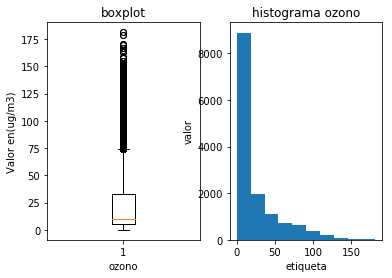

In [73]:
Q1= np.percentile(ozono_NoNan,25)
#print Q1
Q3= np.percentile(ozono_NoNan,75)
#print Q3
IQR = Q3-Q1
plt.figure()
plt.subplot(1,2,1)
plt.boxplot([ozono_NoNan],whis=1.5)
plt.ylabel('Valor en(ug/m3)')
plt.xlabel('ozono')
plt.title('boxplot')
plt.subplot(1,2,2)
plt.hist(ozono_NoNan)
plt.ylabel('valor')
plt.xlabel('etiqueta')
plt.title('histograma ozono')
plt.show()

## Modify

### Continuando con la metodologia se inicia la fase de modificacion de los datos, donde dividimos en subconjuntos de valores atipicos y normales los datos de cada una de las variables. Contamos los valores iguales a 0 para finalmente determinar la fiabilidad de la muestra y evaluar el funcionamiento de los metodos de adquisicion de los datos.

#### Lo primero que debemos hacer es calcular el limite superior del diagrama de cajas, que equivale a sumar al valor del cuartil Q3 un cantidad de 1.5 veces el rango intercuartil (IQR), creamos los subconjuntos y segun la comparacion con el limite de consideracion se llenan los valores normales o atipicos segun corresponda

In [74]:
def crearDatosOzono():
    archivo = open('datosNorOzono.txt','a')
    archivo.close()
crearDatosOzono()


bigsup = Q3 + 1.5*IQR
i=0
contaNor=0
contaAti=0
normal = np.zeros(tamano_ozonoNoNan)
atipico = np.zeros(tamano_ozonoNoNan)
ozonofinal=ozono_NoNan.as_matrix() #Se convierte de tipo series a tipo array 
compa=len(ozonofinal)

while i<compa: 
    valor=ozonofinal[i]
    if valor<bigsup:
        normal[contaNor]=valor
        contaNor=contaNor+1   
    else:
        atipico[contaAti]=valor
        contaAti=contaAti+1
    i=i+1

#### Como paso siguiente debemos eliminar los valores 0 del arreglo que se introdujo en el paso anterior para que los calculos estadisticos que se deseen realizar a los subconjuntos no se vean afectados por los valores 0 que restaron del vector que se creo segun el tamano de la muestra que se traia desde la fase anterior.
#### Para esto necesitamos contar la cantidad de posiciones con valor igual a 0 que se encuentra en cada uno de los arreglos o subconjuntos que se crearon

In [75]:
tamanoNormal=len(normal)
j=0
ceros=0

while j<tamanoNormal:
    valr=normal[j]
    if valr ==0:
        ceros=ceros+1
    j=j+1

tamanoFinalNormal=tamanoNormal-ceros

tamanoAti=len(atipico)
k=0
cerosat=0 

while k<tamanoAti:
    valrat=atipico[k]
    if valrat==0:
        cerosat=cerosat+1
    k=k+1

tamanoFinalAtip=tamanoAti-cerosat

#### Una vez contados los ceros introducidos o valores outliers se crean los vectores finales con el numero de posiciones exacto que permita llenar de manera definitiva los subconjuntos y de esta manera realizar un analisis descriptivo final para establecer posibles ajustes de las fases anteriores antes de continuar con la fase de modelado

In [76]:
normalFinal=np.zeros(tamanoFinalNormal)
atipicoFinal=np.zeros(tamanoFinalAtip)
archivo = open('datosNorOzono.txt', 'w')
archivo.write(str('--VALORES NORMALES DE OZONO--\n'))
conta1=0
contNor=0
conta2=0
contAt=0
suma=0

while conta1<tamanoNormal:
    valcomp=normal[conta1]
    if valcomp!=0:
        normalFinal[contNor]=valcomp
        archivo.write(str(valcomp))
        archivo.write(str('\n'))
        suma = suma + valcomp
        contNor=contNor+1
    conta1=conta1 +1

media = suma/contNor  
archivo.close()

while conta2<tamanoAti:
    valcomp2=atipico[conta2]
    if valcomp2!=0:
        atipicoFinal[contAt]=valcomp2
        contAt=contAt+1
    conta2=conta2+1



#### Una vez obtenidos los conjuntos finales con los valores normales, atípicos superiores e inferiores (teniendo en cuenta que los datos de los conjuntos representarán los valores de ozono obtenidos por el sensor en un día) Vamos a identificar cual es el dato que se enviara para ser almacenado finalmente. Para ello sacamos la Media aritmética de nuestro conjunto de datos normales, posteriormente verificamos que esta se encuentre dentro del intervalo de confianza para que sea un dato valido, puesto que; de no pertenecer al intervalo de confianza la media no representa un dato de relevancia y se debe optar por sacar la mediana aritmética del conjunto de valores normales como dato final del día. 

In [77]:
s = np.array(normalFinal)
n, min_max, mean, var, skew, kurt = stats.describe(s)
std=math.sqrt(var)

R = stats.norm.interval(0.95,loc=mean,scale=std / math.sqrt (len (s)))

print("el intervalo de confianza es: ",R) 
print("La media es: ", media)

('el intervalo de confianza es: ', (16.53342734790634, 17.139701717213946))
('La media es: ', 16.836564532560104)


#### En este bloque realizamos la comparacion de forma automatica para determinar si el valor final diario que almacenaremos  sera producto de la media o la mediana de nuestro conjunto de datos normales, una vez identificado generamos un documento de texto en el que se almacena el valor final diario de ozono, junto con su fecha y hora de registro.

In [78]:
archivoFinal = open('datoFinalOzono.txt', 'a')
archivoFinal.write(str('--VALORES FINALES DIARIOS DE OZONO--\n'))
#media2=6.4
if (media > R[0]) & (media < R[1]):
    print ('la media si pertenece al intervalo')
    fecha = time.strftime("%x")
    hora = time.strftime("%X")
    archivoFinal.write(str(media))
    archivoFinal.write(str(' - '))
    archivoFinal.write(str(fecha))
    archivoFinal.write(str(' - '))
    archivoFinal.write(str(hora))
    archivoFinal.write(str('\n'))
    archivoFinal.close()
else:
    
    print('la media no pertenece al intervalo de confianza')
    datosOrdenados =  s
    datosOrdenados.sort()                                                                                
    #print normalFinal                                                                                  
                                                                                         
    if len(datosOrdenados) % 2 == 0:                                                                      
        n = len(datosOrdenados)                                                                           
        mediana = (datosOrdenados[n/2-1]+ datosOrdenados[n/2] )/2  
        print ('mediana:',mediana)
        fecha = time.strftime("%x")
        hora = time.strftime("%X")
        archivoFinal.write(str(mediana))
        archivoFinal.write(str(' - '))
        archivoFinal.write(str(fecha))
        archivoFinal.write(str(' - '))
        archivoFinal.write(str(hora))
        archivoFinal.write(str('\n'))
        archivoFinal.close()                                                    
    else:                                                                                    
        mediana =datosOrdenados[len(datosOrdenados)/2]                                                                 
        print ('mediana:',mediana)
        fecha = time.strftime("%x")
        hora = time.strftime("%X")
        archivoFinal.write(str(mediana))
        archivoFinal.write(str(' - '))
        archivoFinal.write(str(fecha))
        archivoFinal.write(str(' - '))
        archivoFinal.write(str(hora))
        archivoFinal.write(str('\n'))
        archivoFinal.close()
        

la media si pertenece al intervalo


In [79]:
print ("Conjunto de valores Normales. ",normalFinal)
print ("Conjunto de valores atipicos superiores. ",atipicoFinal)    
#-------------------------------------------------------

biginf = Q1 - 1.5*IQR
i=0
contaNor=0
contaAti=0
normal = np.zeros(tamano_ozonoNoNan)
atipico = np.zeros(tamano_ozonoNoNan)
ozonofinal=ozono_NoNan.as_matrix() #Se convierte de tipo series a tipo array 
compa=len(ozonofinal)

while i<compa: 
    valor=ozonofinal[i]
    if valor>biginf:
        normal[contaNor]=valor
        contaNor=contaNor+1   
    else:
        atipico[contaAti]=valor
        contaAti=contaAti+1
    i=i+1
    

#-------------------------------------------------------
tamanoNormal=len(normal)
j=0
ceros=0

while j<tamanoNormal:
    valr=normal[j]
    if valr ==0:
        ceros=ceros+1
    j=j+1

tamanoFinalNormal=tamanoNormal-ceros
tamanoAti=len(atipico)  
cerosat=0 

while k<tamanoAti:
    valrat=atipico[k]
    if valrat==0:
        cerosat=cerosat+1
    k=k+1

tamanoFinalAtip=tamanoAti-cerosat

('Conjunto de valores Normales. ', array([  5.24,   6.02,   4.6 , ...,  11.9 ,  20.47,  39.98]))
('Conjunto de valores atipicos superiores. ', array([  80.76,   84.87,   93.5 , ...,  101.73,  108.19,   79.34]))


In [80]:
normalFinal2=np.zeros(tamanoFinalNormal)
atipicoFinal2=np.zeros(tamanoFinalAtip)

conta1=0
contNor=0
conta2=0
contAt=0

while conta1<tamanoNormal:
    valcomp=normal[conta1]
    if valcomp!=0:
        normalFinal2[contNor]=valcomp
        contNor=contNor+1
    conta1=conta1 +1

while conta2<tamanoAti:
    valcomp2=atipico[conta2]
    if valcomp2!=0:
        atipicoFinal[contAt]=valcomp2
        contAt=contAt+1
    conta2=conta2+1
    
    
#-------------------------------------------------------
print ("Conjunto de valores atipicos inferiores. ",atipicoFinal2)

('Conjunto de valores atipicos inferiores. ', array([ 0.,  0.,  0., ...,  0.,  0.,  0.]))
